<a href="https://colab.research.google.com/github/SUrooba/CV-Asignmnet01/blob/main/CV_assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install segmentation_models

     |████████████████████████████████| 462 kB 8.1 MB/s 
     |████████████████████████████████| 50 kB 5.0 MB/s 


In [ ]:
import tensorflow as tf
import segmentation_models as sm
import glob 
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
import keras
from tensorflow.keras.utils import normalize
from keras.metrics import MeanIoU

Segmentation Models: using `keras` framework.


In [ ]:
SIZE_X=128
SIZE_Y=128
n_classes=12

In [ ]:
train_images=[]
for directory_path in glob.glob("/content/drive/MyDrive/A3_Dataset/dataset1/images_prepped_train/"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img=cv2.imread(img_path,1)
        img=cv2.resize(img,(SIZE_Y,SIZE_X))
        train_images.append(img)

In [ ]:
train_images=np.array(train_images)

In [ ]:
train_masks=[]
for directory_path in glob.glob("/content/drive/MyDrive/A3_Dataset/dataset1/annotations_prepped_train/"):
    for mask_path in glob.glob(os.path.join(directory_path,"*.png")):
        mask=cv2.imread(mask_path,0)
        mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)
        train_masks.append(mask)

In [ ]:
train_masks=np.array(train_masks)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
print(train_masks.shape)
n,h,w=train_masks.shape
train_masks_reshaped=train_masks.reshape(-1,1)
train_masks_reshaped_encoded=labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape=train_masks_reshaped_encoded.reshape(n,h,w)
np.unique(train_masks_encoded_original_shape)

(367, 128, 128)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
train_masks_input=np.expand_dims(train_masks_encoded_original_shape, axis=3)

In [ ]:
test_images=[]
for directory_path in glob.glob("/content/drive/MyDrive/A3_Dataset/dataset1/images_prepped_test/"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img=cv2.imread(img_path,1)
        img=cv2.resize(img,(SIZE_Y,SIZE_X))
        test_images.append(img)

In [ ]:
test_images=np.array(test_images)

In [ ]:
test_masks=[]
for directory_path in glob.glob("/content/drive/MyDrive/A3_Dataset/dataset1/annotations_prepped_test/"):
    for mask_path in glob.glob(os.path.join(directory_path,"*.png")):
        mask=cv2.imread(mask_path,0)
        mask=cv2.resize(mask,(SIZE_Y,SIZE_X))
        mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)
        test_masks.append(mask)

In [ ]:
test_masks=np.array(test_masks)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
print(test_masks.shape)
n,h,w=test_masks.shape
test_masks_reshaped=test_masks.reshape(-1,1)
test_masks_reshaped_encoded=labelencoder.fit_transform(test_masks_reshaped)
test_masks_encoded_original_shape=test_masks_reshaped_encoded.reshape(n,h,w)
np.unique(test_masks_encoded_original_shape)

(101, 128, 128)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
test_masks_input=np.expand_dims(test_masks_encoded_original_shape, axis=3)

In [ ]:
from sklearn.model_selection import train_test_split
X1, X_val, y1, y_val = train_test_split(train_images, train_masks_input, test_size = 0.20, random_state = 0)

In [ ]:
X_train=X1
y_train=y1
X_validation=X_val
y_validation=y_val
X_test= test_images
y_test=test_masks_input

In [ ]:
print("Total training images=",X_train.shape[0])
print("Total validation images=",X_validation.shape[0])
print("Total test images=",X_test.shape[0])

Total training images= 293
Total validation images= 74
Total test images= 101


In [ ]:
print("Classes values in the dataset are", np.unique(y_train))

Classes values in the dataset are [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [ ]:
from tensorflow.keras.utils import to_categorical
train_masks_cat=to_categorical(y_train, num_classes=12)
print(train_masks_cat.shape)
y_train_cat=train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], 12))

(293, 128, 128, 12)


In [ ]:
test_masks_cat=to_categorical(y_test, num_classes=12)
print(test_masks_cat.shape)
y_test_cat=test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], 12))

(101, 128, 128, 12)


In [ ]:
val_masks_cat=to_categorical(y_val, num_classes=12)
print(val_masks_cat.shape)
y_val_cat=val_masks_cat.reshape((y_val.shape[0], y_val.shape[1], y_val.shape[2], 12))

(74, 128, 128, 12)


In [ ]:
n_classes=12
activation='softmax'
LR=0.0001
import tensorflow 
optim=tensorflow.keras.optimizers.Adam(LR)

In [ ]:
import segmentation_models as sm

sm.set_framework('tf.keras')

sm.framework()

'tf.keras'

In [ ]:
dice_loss = sm.losses.DiceLoss(class_weights=np.array([0.25, 0.25, 0.25, 0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

**Using VGG as backbone architecture for training**

In [ ]:
BACKBONE1 = 'vgg16'
preprocess_input1 = sm.get_preprocessing(BACKBONE1)

# preprocess input
X_train1 = preprocess_input1(X_train)
X_test1 = preprocess_input1(X_test)


# define model
model1 = sm.Unet(BACKBONE1, encoder_weights='imagenet', classes=n_classes, activation=activation)

# compile keras model with defined optimozer, loss and metrics
model1.compile(optim, total_loss, metrics)



print(model1.summary())

history1=model1.fit(X_train1, 
          y_train_cat,
          batch_size=8, 
          epochs=30,
          verbose=1,
          validation_data=(X_val, y_val_cat))

58900480/58889256 [==============================] - 6s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   1792        ['input_1[0][0]']                
                                64)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   36928       ['block1_conv1[0][0]']           
                             

In [ ]:
model1.save('vgg_backbone_30epochs.hdf5')

**Plot the training and validation accuracy and loss at each epoch**

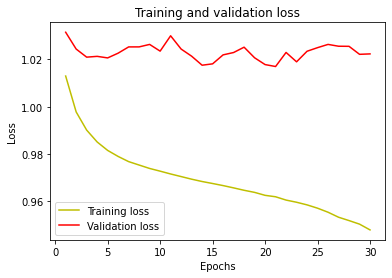

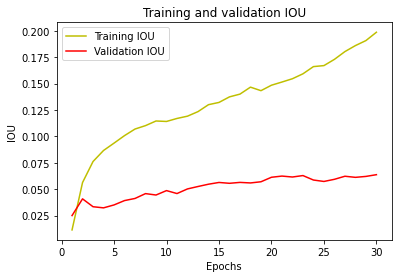

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history1.history['iou_score']
val_acc = history1.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

**Load the saved model**

In [ ]:
from keras.models import load_model
#Set compile=False as we are not loading it for training, only for prediction.
model1 = load_model('vgg_backbone_30epochs.hdf5', compile=False)

**MODEL EVALUTION**

Mean IoU = 0.1615035
IoU for class1 is:  0.54097956
IoU for class2 is:  0.6781906
IoU for class3 is:  0.0
IoU for class4 is:  0.9554177
IoU for class5 is:  0.043623127
IoU for class6 is:  0.31377792
IoU for class7 is:  0.0
IoU for class8 is:  0.002598431
IoU for class9 is:  0.13227893
IoU for class10 is:  0.0
IoU for class11 is:  0.0
IoU for class12 is:  0.021266242


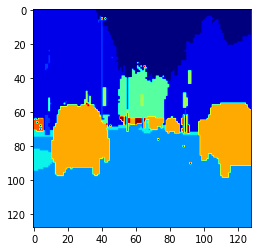

In [ ]:
#IOU
y_pred1=model1.predict(X_test1)
y_pred1_argmax=np.argmax(y_pred1, axis=3)


#Using built in keras function
#from keras.metrics import MeanIoU
n_classes = 12
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test[:,:,:,0], y_pred1_argmax)
print("Mean IoU =", IOU_keras.result().numpy())
#To calculate I0U for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
#print(values)
class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2] + values[0,3] + values[1,0]+ values[2,0]+ values[3,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2] + values[1,3] + values[0,1]+ values[2,1]+ values[3,1])
class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[2,3] + values[0,2]+ values[1,2]+ values[3,2])
class4_IoU = values[3,3]/(values[3,3] + values[3,0] + values[3,1] + values[3,2] + values[0,3]+ values[1,3]+ values[2,3])
class5_IoU = values[4,4]/(values[4,4] + values[4,0] + values[4,1] + values[4,2] + values[4,3]+ values[4,3]+ values[4,3])
class6_IoU = values[5,5]/(values[5,5] + values[5,0] + values[5,1] + values[5,2] + values[5,3]+ values[5,3]+ values[5,3])
class7_IoU = values[6,6]/(values[6,6] + values[6,0] + values[6,1] + values[6,2] + values[6,3]+ values[6,3]+ values[6,3])
class8_IoU = values[7,7]/(values[7,7] + values[7,0] + values[7,1] + values[7,2] + values[7,3]+ values[7,3]+ values[7,3])
class9_IoU = values[8,8]/(values[8,8] + values[8,0] + values[8,1] + values[8,2] + values[8,3]+ values[8,3]+ values[8,3])
class10_IoU = values[9,9]/(values[9,9] + values[9,0] + values[9,1] + values[9,2] + values[9,3]+ values[9,3]+ values[9,3])
class11_IoU = values[10,10]/(values[10,10] + values[10,0] + values[10,1] + values[10,2] + values[10,3]+ values[10,3]+ values[10,3])
class12_IoU = values[11,11]/(values[11,11] + values[11,0] + values[11,1] + values[11,2] + values[11,3]+ values[11,3]+ values[11,3])
print("IoU for class1 is: ", class1_IoU)
print("IoU for class2 is: ", class2_IoU)
print("IoU for class3 is: ", class3_IoU)
print("IoU for class4 is: ", class4_IoU)
print("IoU for class5 is: ", class5_IoU)
print("IoU for class6 is: ", class6_IoU)
print("IoU for class7 is: ", class7_IoU)
print("IoU for class8 is: ", class8_IoU)
print("IoU for class9 is: ", class9_IoU)
print("IoU for class10 is: ", class10_IoU)
print("IoU for class11 is: ", class11_IoU)
print("IoU for class12 is: ", class12_IoU)

#Vaerify the prediction on first image
plt.imshow(train_images[0, :,:,0], cmap='jet')
plt.imshow(train_masks[0], cmap='jet')

**TEST Model on some random images**

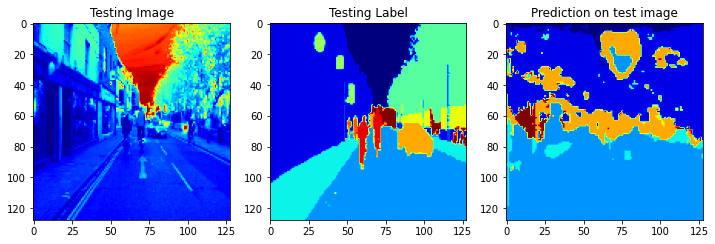

In [ ]:
import random
test_img_number = random.randint(0, len(X_test1))
test_img = X_test1[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)

test_img_input1 = preprocess_input1(test_img_input)

test_pred1 = model1.predict(test_img_input1)
test_prediction1 = np.argmax(test_pred1, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='jet')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction1, cmap='jet')
plt.show()

**USING RESNET AS THE BACKBONE**

In [ ]:
###Model 2
BACKBONE2 = 'resnet34'
preprocess_input2 = sm.get_preprocessing(BACKBONE2)

# preprocess input
X_train2 = preprocess_input2(X_train)
X_test2 = preprocess_input2(X_test)

# define model
model2 = sm.Unet(BACKBONE2, encoder_weights='imagenet', classes=n_classes, activation=activation)

# compile keras model with defined optimozer, loss and metrics
model2.compile(optim, total_loss, metrics=metrics)

#model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

print(model2.summary())

85532672/85521592 [==============================] - 9s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['bn_data[0][0]']                
                           

In [ ]:
history2=model2.fit(X_train2, 
          y_train_cat,
          batch_size=8, 
          epochs=30,
          verbose=1,
          validation_data=(X_val, y_val_cat))

Epoch 1/30
37/37 [==============================] - 130s 3s/step - loss: 0.9985 - iou_score: 0.0608 - f1-score: 0.0866 - val_loss: 1.0235 - val_iou_score: 0.0983 - val_f1-score: 0.1225
Epoch 2/30
37/37 [==============================] - 121s 3s/step - loss: 0.9679 - iou_score: 0.1371 - f1-score: 0.1819 - val_loss: 0.9880 - val_iou_score: 0.1091 - val_f1-score: 0.1327
Epoch 3/30
37/37 [==============================] - 122s 3s/step - loss: 0.9603 - iou_score: 0.1605 - f1-score: 0.2120 - val_loss: 0.9896 - val_iou_score: 0.0907 - val_f1-score: 0.1193
Epoch 4/30
37/37 [==============================] - 122s 3s/step - loss: 0.9553 - iou_score: 0.1757 - f1-score: 0.2310 - val_loss: 0.9754 - val_iou_score: 0.1227 - val_f1-score: 0.1649
Epoch 5/30
37/37 [==============================] - 122s 3s/step - loss: 0.9520 - iou_score: 0.1908 - f1-score: 0.2490 - val_loss: 0.9744 - val_iou_score: 0.1272 - val_f1-score: 0.1720
Epoch 6/30
37/37 [==============================] - 123s 3s/step - loss: 0.

**Plot the training and validation accuracy and loss at each epoch**

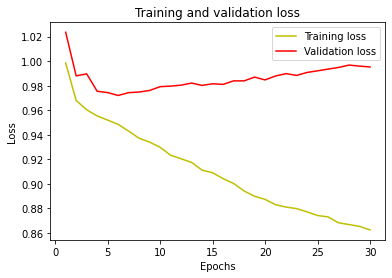

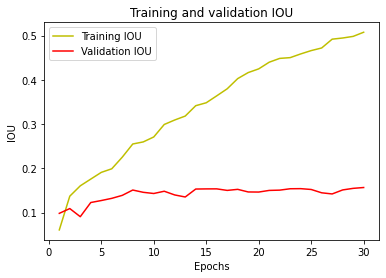

In [ ]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history2.history['iou_score']
val_acc = history2.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

**MODEL EVALUTION**

Mean IoU = 0.15677966
IoU for class1 is:  0.62734574
IoU for class2 is:  0.7333808
IoU for class3 is:  0.0011811446
IoU for class4 is:  0.9768101
IoU for class5 is:  0.0933866
IoU for class6 is:  0.01785542
IoU for class7 is:  5.8349866e-05
IoU for class8 is:  4.384138e-05
IoU for class9 is:  0.21728942
IoU for class10 is:  0.0004742483
IoU for class11 is:  0.0010724682
IoU for class12 is:  0.15210985


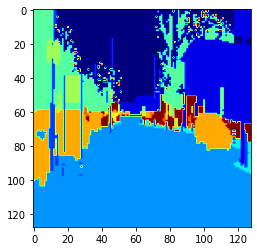

In [ ]:
#IOU
y_pred2=model2.predict(X_test2)
y_pred2_argmax=np.argmax(y_pred2, axis=3)


#Using built in keras function
#from keras.metrics import MeanIoU
n_classes = 12
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test[:,:,:,0], y_pred2_argmax)
print("Mean IoU =", IOU_keras.result().numpy())
#To calculate I0U for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
#print(values)
class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2] + values[0,3] + values[1,0]+ values[2,0]+ values[3,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2] + values[1,3] + values[0,1]+ values[2,1]+ values[3,1])
class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[2,3] + values[0,2]+ values[1,2]+ values[3,2])
class4_IoU = values[3,3]/(values[3,3] + values[3,0] + values[3,1] + values[3,2] + values[0,3]+ values[1,3]+ values[2,3])
class5_IoU = values[4,4]/(values[4,4] + values[4,0] + values[4,1] + values[4,2] + values[4,3]+ values[4,3]+ values[4,3])
class6_IoU = values[5,5]/(values[5,5] + values[5,0] + values[5,1] + values[5,2] + values[5,3]+ values[5,3]+ values[5,3])
class7_IoU = values[6,6]/(values[6,6] + values[6,0] + values[6,1] + values[6,2] + values[6,3]+ values[6,3]+ values[6,3])
class8_IoU = values[7,7]/(values[7,7] + values[7,0] + values[7,1] + values[7,2] + values[7,3]+ values[7,3]+ values[7,3])
class9_IoU = values[8,8]/(values[8,8] + values[8,0] + values[8,1] + values[8,2] + values[8,3]+ values[8,3]+ values[8,3])
class10_IoU = values[9,9]/(values[9,9] + values[9,0] + values[9,1] + values[9,2] + values[9,3]+ values[9,3]+ values[9,3])
class11_IoU = values[10,10]/(values[10,10] + values[10,0] + values[10,1] + values[10,2] + values[10,3]+ values[10,3]+ values[10,3])
class12_IoU = values[11,11]/(values[11,11] + values[11,0] + values[11,1] + values[11,2] + values[11,3]+ values[11,3]+ values[11,3])

print("IoU for class1 is: ", class1_IoU)
print("IoU for class2 is: ", class2_IoU)
print("IoU for class3 is: ", class3_IoU)
print("IoU for class4 is: ", class4_IoU)
print("IoU for class5 is: ", class5_IoU)
print("IoU for class6 is: ", class6_IoU)
print("IoU for class7 is: ", class7_IoU)
print("IoU for class8 is: ", class8_IoU)
print("IoU for class9 is: ", class9_IoU)
print("IoU for class10 is: ", class10_IoU)
print("IoU for class11 is: ", class11_IoU)
print("IoU for class12 is: ", class12_IoU)

#Vaerify the prediction on first image
plt.imshow(train_images[3, :,:,0], cmap='jet')
plt.imshow(train_masks[3], cmap='jet')

**TEST Model on some random images**

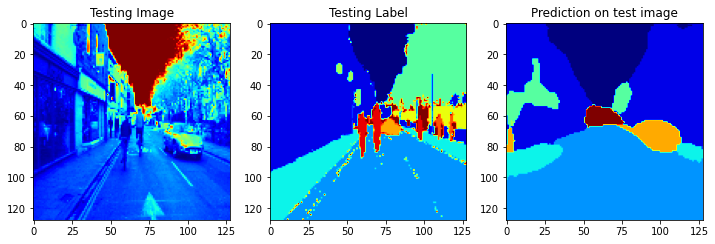

In [ ]:
import random
test_img_number = random.randint(0, len(X_test2))
test_img = X_test2[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)

test_img_input2 = preprocess_input2(test_img_input)

test_pred2 = model2.predict(test_img_input2)
test_prediction2 = np.argmax(test_pred2, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='jet')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction2, cmap='jet')
plt.show()
